# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#### Analyis
Observed Trends
1.  
2.  
3.  

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

637

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
date = []
city_list = []
latitude = []
longitude = []
humidity = []
cloudiness = []
wind_speed = []
max_temp = []

record_no = 0
set_no = 1

print("Beginning Data Retrieval")
print("-------------------------")

base_url = "https://api.openweathermap.org/data/2.5/weather?"
query_url = f"{base_url}&appid={weather_api_key}&q="

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        date.append(response["dt"])        
        city_list.append(response["name"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        max_temp.append(response['main']['temp_max'])
    
        if record_no >= 50:
            record_no = 0
            set_no += 1
        else:
            record_no += 1
            
        print(f"Processing Record {record_no} of Set {set_no} | {city}")
        
    except(KeyError, IndexError):
        print("City not found. Skipping...")
        

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")         

Beginning Data Retrieval
-------------------------
Processing Record 1 of Set 1 | akureyri
City not found. Skipping...
Processing Record 2 of Set 1 | cidreira
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | vostok
Processing Record 5 of Set 1 | nuuk
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | castro
Processing Record 9 of Set 1 | kodiak
Processing Record 10 of Set 1 | tateyama
Processing Record 11 of Set 1 | severo-kurilsk
Processing Record 12 of Set 1 | hilo
City not found. Skipping...
Processing Record 13 of Set 1 | tuktoyaktuk
Processing Record 14 of Set 1 | ancud
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | big bend
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | mar del plata
Processing Record 19 of Set 1 | yulara
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | kysyl-syr
Processing Record 22 of Set 1 | katsuura
Processing Re

Processing Record 32 of Set 4 | makakilo city
Processing Record 33 of Set 4 | sao joao da barra
Processing Record 34 of Set 4 | san patricio
Processing Record 35 of Set 4 | saint george
Processing Record 36 of Set 4 | qaanaaq
Processing Record 37 of Set 4 | kawambwa
Processing Record 38 of Set 4 | khasan
Processing Record 39 of Set 4 | jamestown
City not found. Skipping...
Processing Record 40 of Set 4 | belyy yar
City not found. Skipping...
Processing Record 41 of Set 4 | port macquarie
Processing Record 42 of Set 4 | sompeta
Processing Record 43 of Set 4 | tiznit
Processing Record 44 of Set 4 | kuytun
Processing Record 45 of Set 4 | new norfolk
Processing Record 46 of Set 4 | wajir
Processing Record 47 of Set 4 | kota bahru
Processing Record 48 of Set 4 | herre
Processing Record 49 of Set 4 | mkushi
City not found. Skipping...
Processing Record 50 of Set 4 | rognan
Processing Record 0 of Set 5 | mirnyy
Processing Record 1 of Set 5 | mao
Processing Record 2 of Set 5 | srandakan
Proces

Processing Record 20 of Set 8 | fort nelson
Processing Record 21 of Set 8 | zeya
Processing Record 22 of Set 8 | traverse city
Processing Record 23 of Set 8 | tanout
Processing Record 24 of Set 8 | carutapera
Processing Record 25 of Set 8 | inhambane
Processing Record 26 of Set 8 | san quintin
Processing Record 27 of Set 8 | bobrov
Processing Record 28 of Set 8 | barra do corda
Processing Record 29 of Set 8 | thinadhoo
City not found. Skipping...
Processing Record 30 of Set 8 | ust-kuyga
Processing Record 31 of Set 8 | kasongo-lunda
Processing Record 32 of Set 8 | port lincoln
Processing Record 33 of Set 8 | bukama
Processing Record 34 of Set 8 | qaqortoq
Processing Record 35 of Set 8 | berlevag
Processing Record 36 of Set 8 | kedrovyy
Processing Record 37 of Set 8 | helong
Processing Record 38 of Set 8 | amazar
Processing Record 39 of Set 8 | fernie
Processing Record 40 of Set 8 | wainwright
Processing Record 41 of Set 8 | ixtapa
Processing Record 42 of Set 8 | ostrow wielkopolski
Pro

Processing Record 2 of Set 12 | paraiso
Processing Record 3 of Set 12 | santa rosa
Processing Record 4 of Set 12 | corinto
Processing Record 5 of Set 12 | santa ana
Processing Record 6 of Set 12 | shingu
Processing Record 7 of Set 12 | andijon
Processing Record 8 of Set 12 | roald
City not found. Skipping...
City not found. Skipping...
Processing Record 9 of Set 12 | bikaner
Processing Record 10 of Set 12 | hammerfest
Processing Record 11 of Set 12 | mattru
City not found. Skipping...
City not found. Skipping...
Processing Record 12 of Set 12 | zuenoula
Processing Record 13 of Set 12 | mitsamiouli
Processing Record 14 of Set 12 | alto lucero
Processing Record 15 of Set 12 | bam
Processing Record 16 of Set 12 | biak
Processing Record 17 of Set 12 | gobabis
Processing Record 18 of Set 12 | tarata
Processing Record 19 of Set 12 | ha tinh
Processing Record 20 of Set 12 | tartagal
Processing Record 21 of Set 12 | suicheng
City not found. Skipping...
-----------------------------
Data Retrie

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [40]:
weather_df = pd.DataFrame({
    "Date":date,
    "City":city_list,
    "Latitude":latitude,
    "Longitude":longitude,
    "Humidity":humidity,
    "Cloudiness":cloudiness,
    "Wind Speed":wind_speed,
    "Max Temp": max_temp
       
})

weather_df.head()
weather_df.to_csv("../output_data/weather_data.csv", index = False)

In [16]:
descriptive_weather = weather_df.describe(exclude=[object])
descriptive_weather

,Date,Latitude,Longitude,Humidity,Cloudiness,Wind Speed,Max Temp
count,5.820000e+02,582.000000,582.000000,582.00000,582.000000,582.000000,582.000000
mean,1.653636e+09,19.549212,21.747250,68.12543,54.202749,3.492973,292.232715
std,9.893713e+01,33.481942,87.801229,23.56088,42.075706,2.291495,9.282137
min,1.653635e+09,-54.800000,-175.200000,1.00000,0.000000,0.000000,261.300000
25%,1.653636e+09,-8.904150,-53.321200,54.00000,7.000000,1.722500,285.495000
50%,1.653636e+09,22.912100,26.789300,74.00000,60.000000,3.090000,293.260000
75%,1.653636e+09,48.525075,97.183775,87.00000,100.000000,4.637500,298.972500
max,1.653636e+09,78.218600,179.316700,100.00000,100.000000,14.400000,315.320000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs in the output_data folder
* Below are examples of what you should get but your results will be different.

## Latitude vs. Temperature Plot

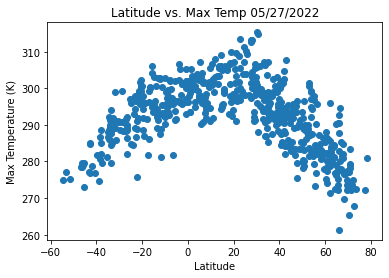

In [19]:
scatter_lat = weather_df["Latitude"]
scatter_temp = weather_df["Max Temp"]
plt.scatter(scatter_lat,scatter_temp)
plt.title("Latitude vs. Max Temp 05/27/2022")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (K)")
plt.savefig("../Images/Latitude_vs_Temperature")
plt.show()

## Latitude vs. Humidity Plot

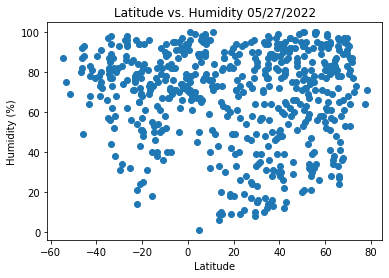

In [21]:
humidity_scatter = weather_df["Humidity"]
plt.scatter(scatter_lat,humidity_scatter)
plt.title("Latitude vs. Humidity 05/27/2022")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("../Images/Latitude_vs_Humidity")
plt.show()

## Latitude vs. Cloudiness Plot

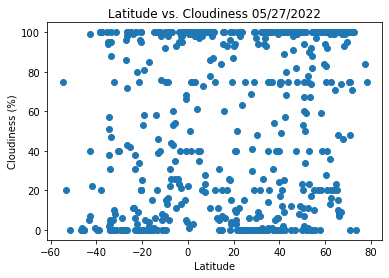

In [23]:
cloud_scatter = weather_df["Cloudiness"]
plt.scatter(scatter_lat,cloud_scatter)
plt.title("Latitude vs. Cloudiness 05/27/2022")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("../Images/Latitude_vs_Cloudiness")
plt.show()

## Latitude vs. Wind Speed Plot

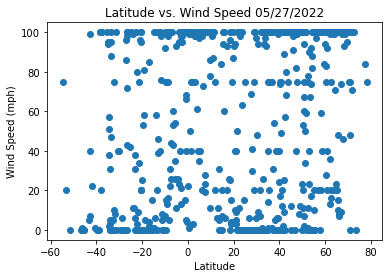

In [24]:
wind_scatter = weather_df["Wind Speed"]
plt.scatter(scatter_lat,cloud_scatter)
plt.title("Latitude vs. Wind Speed 05/27/2022")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("../Images/Latitude_vs_Windspeed")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

β0= 306.6267273660839
β1= -0.3725929881996824
r= -0.7575461088905757
interpretation: latitude goes up max temp goes down


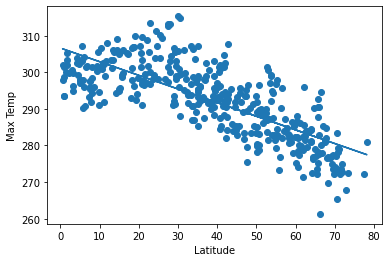

In [30]:
north = weather_df.loc[weather_df["Latitude"] >= 0,:]
south = weather_df.loc[weather_df["Latitude"] <= 0,:]

north_lat_reg = north["Latitude"]
north_temp_reg = north["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat_reg,north_temp_reg)
north_outputs = north_lat_reg * slope + intercept
plt.scatter(north_lat_reg,north_temp_reg)

plt.plot(north_lat_reg,north_outputs)

plt.xlabel("Latitude")
plt.ylabel("Max Temp")

print(f"β0= {intercept}")
print(f"β1= {slope}")
print(f"r= {rvalue}")
print("interpretation: latitude goes up max temp goes down")

plt.savefig("../Images/Northern_Hemisphere_Latitude_vs_MaxTemp")




####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

β0= 301.2144986701882
β1= 0.4196096196318489
r= 0.736208710643703
interpretation: latitude goes up max temp goes up


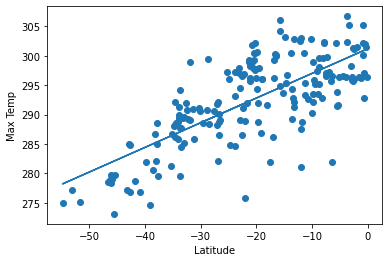

In [31]:
south_lat_reg = south["Latitude"]
south_temp_reg = south["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat_reg,south_temp_reg)
south_outputs = south_lat_reg * slope + intercept
plt.scatter(south_lat_reg,south_temp_reg)

plt.plot(south_lat_reg,south_outputs)

plt.xlabel("Latitude")
plt.ylabel("Max Temp")

print(f"β0= {intercept}")
print(f"β1= {slope}")
print(f"r= {rvalue}")
print("interpretation: latitude goes up max temp goes up")

plt.savefig("../Images/Southern_Hemisphere_Latitude_vs_MaxTemp")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

β0= 63.239178477798625
β1= 0.07212772540987139
r= 0.05766199756498826
interpretation: not a strong correlation between latitude and humidity


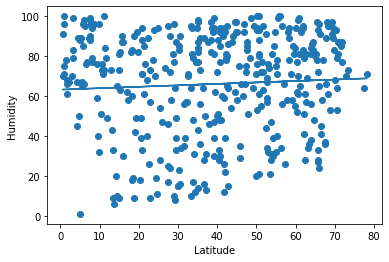

In [33]:
north_hum_reg = north["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat_reg,north_hum_reg)
north_outputs = north_lat_reg * slope + intercept
plt.scatter(north_lat_reg,north_hum_reg)

plt.plot(north_lat_reg,north_outputs)

plt.xlabel("Latitude")
plt.ylabel("Humidity")

print(f"β0= {intercept}")
print(f"β1= {slope}")
print(f"r= {rvalue}")
print("interpretation: not a strong correlation between latitude and humidity")

plt.savefig("../Images/Northern_Hemisphere_Latitude_vs_Humidity")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

β0= 71.5057690582927
β1= -0.046943243582568746
r= -0.03404449988812813
interpretation: not a strong correlation between latitude and humidity


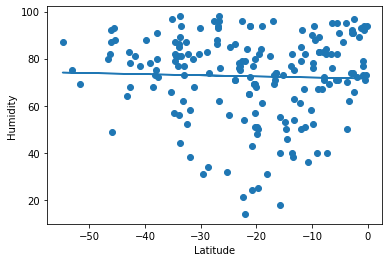

In [34]:
south_hum_reg = south["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat_reg,south_hum_reg)
south_outputs = south_lat_reg * slope + intercept
plt.scatter(south_lat_reg,south_hum_reg)

plt.plot(south_lat_reg,south_outputs)

plt.xlabel("Latitude")
plt.ylabel("Humidity")

print(f"β0= {intercept}")
print(f"β1= {slope}")
print(f"r= {rvalue}")
print("interpretation: not a strong correlation between latitude and humidity")

plt.savefig("../Images/Southern_Hemisphere_Latitude_vs_Humidity")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

β0= 51.63972059025919
β1= 0.22243269297924104
r= 0.1094460847406656
interpretation: not a strong correlation between latitude and humidity


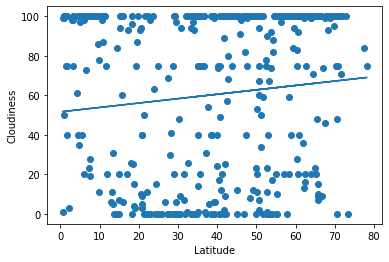

In [35]:
north_cloud_reg = north["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat_reg,north_cloud_reg)
north_outputs = north_lat_reg * slope + intercept
plt.scatter(north_lat_reg,north_cloud_reg)

plt.plot(north_lat_reg,north_outputs)

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f"β0= {intercept}")
print(f"β1= {slope}")
print(f"r= {rvalue}")
print("weak relationship between how far north and cloudiness")

plt.savefig("../Images/Northern_Hemisphere_Latitude_vs_Cloudiness")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

β0= 53.230353116505334
β1= 0.562131193294993
r= 0.18215907850086005
weak relationship between how far north and cloudiness


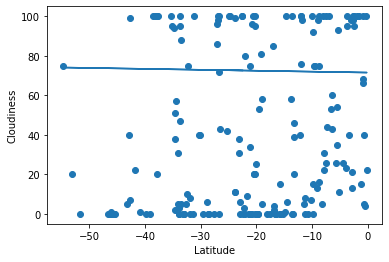

In [36]:
south_cloud_reg = south["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat_reg,south_cloud_reg)
north_outputs = south_lat_reg * slope + intercept
plt.scatter(south_lat_reg,south_cloud_reg)

plt.plot(south_lat_reg,south_outputs)

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f"β0= {intercept}")
print(f"β1= {slope}")
print(f"r= {rvalue}")
print("weak relationship between how far north and cloudiness in southern hemisphere")

plt.savefig("../Images/Southern_Hemisphere_Latitude_vs_Cloudiness")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

β0= 2.793386062539054
β1= 0.025348420512118507
r= 0.22250922673241563
weak negative relationship between how far north and cloudiness in southern hemisphere


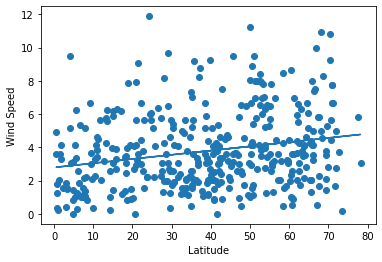

In [39]:
north_wind_reg = north["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat_reg,north_wind_reg)
north_outputs = north_lat_reg * slope + intercept
plt.scatter(north_lat_reg,north_wind_reg)

plt.plot(north_lat_reg,north_outputs)

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

print(f"β0= {intercept}")
print(f"β1= {slope}")
print(f"r= {rvalue}")
print("weak positive relationship between how far north and wind speed in southern hemisphere")

plt.savefig("../Images/Northern_Hemisphere_Latitude_vs_WindSpeed")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

β0= 2.536488537922949
β1= -0.01705965510800325
r= -0.10654153696594676
weak negative relationship between how far north and cloudiness in southern hemisphere


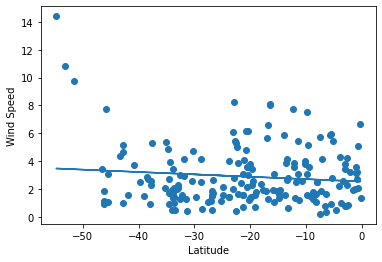

In [38]:
south_wind_reg = south["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat_reg,south_wind_reg)
south_outputs = south_lat_reg * slope + intercept
plt.scatter(south_lat_reg,south_wind_reg)

plt.plot(south_lat_reg,south_outputs)

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

print(f"β0= {intercept}")
print(f"β1= {slope}")
print(f"r= {rvalue}")
print("weak negative relationship between how far north and wind speed in southern hemisphere")

plt.savefig("../Images/Southern_Hemisphere_Latitude_vs_WindSpeed")